# 피쳐 엔지니어링

In [1]:
import pandas as pd
import numpy as np

#시각화, 한글폰트
%matplotlib inline  
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

# 맥 기본 폰트 중 사용
rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False

### 데이터 불러오기

In [3]:
DATA_PATH = '/Users/kimsinwoo/Desktop/ddd/MultiCampus/MiniPJT/data/'
origin_df = pd.read_csv(DATA_PATH + '20230914_인코딩완료.csv') # 인코딩까지 완료한 데이터
trans_df = pd.read_csv(DATA_PATH + '면적당환산_230913.csv') # 인코딩 후 10000 제곱미터 면적당 변환한 데이터

## Feature extraction

In [5]:
origin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5484 entries, 0 to 5483
Data columns (total 58 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   매출                      5484 non-null   float64
 1   기준_년_코드                 5484 non-null   int64  
 2   상권_구분_코드_명              5484 non-null   object 
 3   상권_코드                   5484 non-null   int64  
 4   상권_코드_명                 5484 non-null   object 
 5   점포수                     5484 non-null   int64  
 6   시간대1                    5484 non-null   int64  
 7   시간대2                    5484 non-null   int64  
 8   시간대3                    5484 non-null   int64  
 9   시간대4                    5484 non-null   int64  
 10  시간대5                    5484 non-null   int64  
 11  분기_1                    5484 non-null   int64  
 12  분기_2                    5484 non-null   int64  
 13  분기_3                    5484 non-null   int64  
 14  총 상주인구 수                5484 non-null   

- 인구 관련 컬럼 리스트

In [26]:
pop_cols = ['기준_년_코드','상권_구분_코드_명','상권_코드','상권_코드_명','시간대1','시간대2','시간대3','시간대4','시간대5','총 상주인구 수','총_직장인구_수','총_생활인구_수','시간대_생활인구_수','월요일_생활인구_수'
            ,'화요일_생활인구_수','수요일_생활인구_수','목요일_생활인구_수','금요일_생활인구_수','토요일_생활인구_수','일요일_생활인구_수'
            ,'연령대_10_생활인구_수','연령대_20_생활인구_수','연령대_30_생활인구_수','연령대_40_생활인구_수','연령대_50_생활인구_수'
            ,'연령대_60_이상_생활인구_수']

In [27]:
pop_df = origin_df[pop_cols]

## 파생변수 - 인구공동화현상에 따른 생활인구 파생변수(주간, 야간, 비율)

In [ ]:
pop_df['주간_생활인구'] 
if pop_df['시간대 1pop_df['시간대_

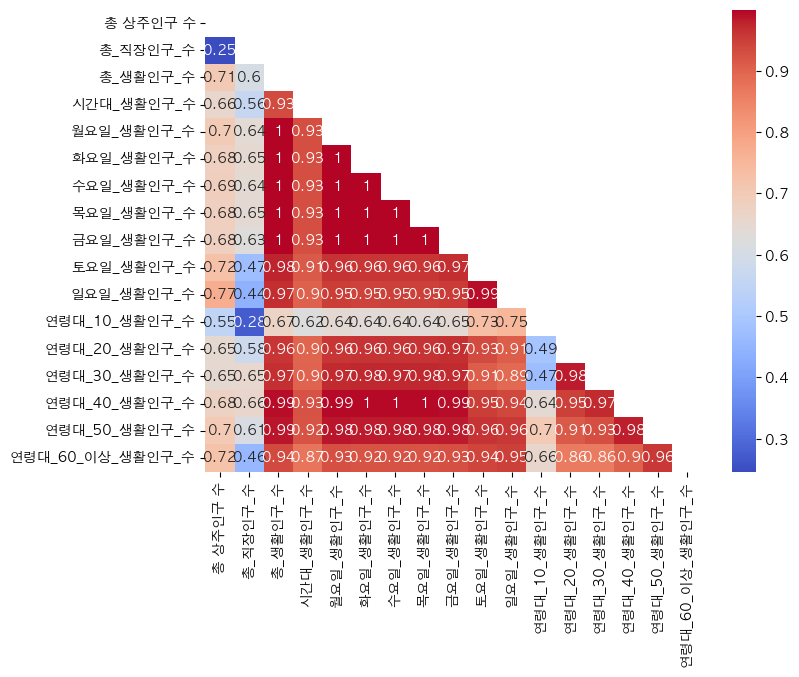

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))
correlation_matrix = pop_df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True,ax=ax, mask=mask)
plt.show()

In [ ]:
총 생활인구 수랑 상주인구 수 상관관계가 높음!

In [32]:
pop_df.columns

Index(['매출', '기준_년_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '시간대1', '시간대2',
       '시간대3', '시간대4', '시간대5', '총 상주인구 수', '총_직장인구_수', '총_생활인구_수',
       '시간대_생활인구_수', '월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수',
       '금요일_생활인구_수', '토요일_생활인구_수', '일요일_생활인구_수', '연령대_10_생활인구_수',
       '연령대_20_생활인구_수', '연령대_30_생활인구_수', '연령대_40_생활인구_수', '연령대_50_생활인구_수',
       '연령대_60_이상_생활인구_수'],
      dtype='object')

In [43]:
data = pd.read_csv('/Users/kimsinwoo/Desktop/ddd/MultiCampus/MiniPJT/data/20230911_3번작업완료.csv')

In [44]:
data

,기준_년_코드,기준_분기_코드,상권_구분_코드_명,상권_코드,상권_코드_명,점포수,시간대1,시간대2,시간대3,시간대4,...,연령대_50_생활인구_수,연령대_60_이상_생활인구_수,배후지_아파트_단지_수,배후지_아파트_가격_1_억_미만_세대_수,배후지_아파트_가격_1_억_세대_수,배후지_아파트_가격_2_억_세대_수,배후지_아파트_가격_3_억_세대_수,배후지_아파트_가격_4_억_세대_수,배후지_아파트_가격_5_억_세대_수,배후지_아파트_가격_6_억_이상_세대_수
0,2020,1,골목상권,2110949,한남IC,6,125163.15020,217164.87910,256343.26370,217222.53660,...,46985,60207,57.0,5.0,259.0,163.0,64.0,52.0,42.0,1802.0
1,2020,1,골목상권,2110951,신사은행나무공원,3,94688.22344,66467.59341,80462.01099,87369.39927,...,59120,81334,108.0,11.0,436.0,309.0,119.0,81.0,68.0,109.0
2,2020,1,골목상권,2110952,논현목련공원,3,177736.46150,127178.91940,105252.36630,103031.02560,...,21834,36587,173.0,24.0,780.0,964.0,124.0,151.0,82.0,138.0
3,2020,1,골목상권,2110954,국기원,3,34587.75458,56082.13919,74176.18681,83521.20513,...,35369,34193,52.0,6.0,285.0,226.0,67.0,49.0,50.0,68.0
4,2020,1,골목상권,2110955,논현초등학교,30,221061.48320,145577.44840,110301.37000,137054.14210,...,266093,418431,398.0,76.0,2312.0,1553.0,325.0,262.0,204.0,286.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,2022,4,골목상권,2110994,개포고등학교,3,99866.93116,247191.90940,194047.29350,154291.71010,...,65903,106563,72.0,0.0,58.0,99.0,91.0,42.0,12.0,1372.0
910,2022,4,발달상권,2120210,선릉역,39,303125.01420,647668.85650,560624.32720,442103.92200,...,665053,620327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
911,2022,4,발달상권,2120188,압구정역,16,101724.46200,382494.94160,316498.13110,317926.02040,...,258417,293564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
912,2022,4,발달상권,2120186,가로수길,15,155169.26010,270461.51230,252058.40580,247267.85800,...,249909,281144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
data.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '점포수', '시간대1',
       '시간대2', '시간대3', '시간대4', '시간대5', '시간대6', '총 상주인구 수', '총 가구 수',
       '총_직장인구_수', '아파트_단지_수', '아파트_가격_1_억_미만_세대_수', '아파트_가격_1_억_세대_수',
       '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수', '아파트_가격_4_억_세대_수',
       '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '총_생활인구_수', '시간대_1_생활인구_수',
       '시간대_2_생활인구_수', '시간대_3_생활인구_수', '시간대_4_생활인구_수', '시간대_5_생활인구_수',
       '시간대_6_생활인구_수', '월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수',
       '금요일_생활인구_수', '토요일_생활인구_수', '일요일_생활인구_수', '집객시설_수', '관공서_수', '은행_수',
       '백화점_수', '숙박_시설_수', '직장인구비율', 'area', '면적당편의점수(10000제곱미터)', '상주인구비율',
       '시간대_1_비율', '시간대_2_비율', '시간대_3_비율', '시간대_4_비율', '시간대_5_비율', '시간대_6_비율',
       '월요일_비율', '화요일_비율', '수요일_비율', '목요일_비율', '금요일_비율', '토요일_비율', '일요일_비율',
       '연령대_10_생활인구_수', '연령대_20_생활인구_수', '연령대_30_생활인구_수', '연령대_40_생활인구_수',
       '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수', '배후지_아파트_단지_수',
       '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1

In [74]:
pop_cols = ['기준_년_코드', '기준_분기_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명','시간대1',
       '시간대2', '시간대3', '시간대4', '시간대5', '시간대6','총_생활인구_수', '시간대_1_생활인구_수',
       '시간대_2_생활인구_수', '시간대_3_생활인구_수', '시간대_4_생활인구_수', '시간대_5_생활인구_수',
       '시간대_6_생활인구_수', '월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수',
       '금요일_생활인구_수', '토요일_생활인구_수', '일요일_생활인구_수','연령대_10_생활인구_수', '연령대_20_생활인구_수', '연령대_30_생활인구_수', '연령대_40_생활인구_수',
       '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수','직장인구비율']

In [75]:
data_pop = data[pop_cols]

In [76]:
data_pop

,기준_년_코드,기준_분기_코드,상권_구분_코드_명,상권_코드,상권_코드_명,시간대1,시간대2,시간대3,시간대4,시간대5,...,금요일_생활인구_수,토요일_생활인구_수,일요일_생활인구_수,연령대_10_생활인구_수,연령대_20_생활인구_수,연령대_30_생활인구_수,연령대_40_생활인구_수,연령대_50_생활인구_수,연령대_60_이상_생활인구_수,직장인구비율
0,2020,1,골목상권,2110949,한남IC,125163.15020,217164.87910,256343.26370,217222.53660,304378.8242,...,60271,52877,47711,42421,85100,91787,70027,46985,60207,0.004244
1,2020,1,골목상권,2110951,신사은행나무공원,94688.22344,66467.59341,80462.01099,87369.39927,188897.8974,...,89112,74083,66223,38359,139161,153097,110939,59120,81334,0.000469
2,2020,1,골목상권,2110952,논현목련공원,177736.46150,127178.91940,105252.36630,103031.02560,217967.5128,...,33613,32730,33196,19605,59950,59971,37953,21834,36587,0.000496
3,2020,1,골목상권,2110954,국기원,34587.75458,56082.13919,74176.18681,83521.20513,138064.7070,...,84004,82246,63536,53752,235048,117395,64711,35369,34193,0.001177
4,2020,1,골목상권,2110955,논현초등학교,221061.48320,145577.44840,110301.37000,137054.14210,316572.7293,...,408607,386684,388001,197875,719028,767691,470543,266093,418431,0.001208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,2022,4,골목상권,2110994,개포고등학교,99866.93116,247191.90940,194047.29350,154291.71010,302690.6014,...,63954,60895,57580,98247,40551,55142,75996,65903,106563,0.001117
910,2022,4,발달상권,2120210,선릉역,303125.01420,647668.85650,560624.32720,442103.92200,769798.1394,...,786553,553938,475110,605577,886764,1206099,1019901,665053,620327,0.009749
911,2022,4,발달상권,2120188,압구정역,101724.46200,382494.94160,316498.13110,317926.02040,468586.1760,...,305916,259018,212265,283918,318826,398944,381202,258417,293564,0.004434
912,2022,4,발달상권,2120186,가로수길,155169.26010,270461.51230,252058.40580,247267.85800,366435.8775,...,355283,319185,267477,232015,551031,549677,414588,249909,281144,0.002861


In [77]:
data_pop['시간대6_생활인구_비율'] = data_pop['시간대_6_생활인구_수'] / data_pop['총_생활인구_수']

/var/folders/nz/vk3v33x95bs4kf3ymy0z0my00000gn/T/ipykernel_3688/917597998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pop['시간대6_생활인구_비율'] = data_pop['시간대_6_생활인구_수'] / data_pop['총_생활인구_수']


In [78]:
data_pop

,기준_년_코드,기준_분기_코드,상권_구분_코드_명,상권_코드,상권_코드_명,시간대1,시간대2,시간대3,시간대4,시간대5,...,토요일_생활인구_수,일요일_생활인구_수,연령대_10_생활인구_수,연령대_20_생활인구_수,연령대_30_생활인구_수,연령대_40_생활인구_수,연령대_50_생활인구_수,연령대_60_이상_생활인구_수,직장인구비율,시간대6_생활인구_비율
0,2020,1,골목상권,2110949,한남IC,125163.15020,217164.87910,256343.26370,217222.53660,304378.8242,...,52877,47711,42421,85100,91787,70027,46985,60207,0.004244,0.111718
1,2020,1,골목상권,2110951,신사은행나무공원,94688.22344,66467.59341,80462.01099,87369.39927,188897.8974,...,74083,66223,38359,139161,153097,110939,59120,81334,0.000469,0.118438
2,2020,1,골목상권,2110952,논현목련공원,177736.46150,127178.91940,105252.36630,103031.02560,217967.5128,...,32730,33196,19605,59950,59971,37953,21834,36587,0.000496,0.121907
3,2020,1,골목상권,2110954,국기원,34587.75458,56082.13919,74176.18681,83521.20513,138064.7070,...,82246,63536,53752,235048,117395,64711,35369,34193,0.001177,0.122810
4,2020,1,골목상권,2110955,논현초등학교,221061.48320,145577.44840,110301.37000,137054.14210,316572.7293,...,386684,388001,197875,719028,767691,470543,266093,418431,0.001208,0.120951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,2022,4,골목상권,2110994,개포고등학교,99866.93116,247191.90940,194047.29350,154291.71010,302690.6014,...,60895,57580,98247,40551,55142,75996,65903,106563,0.001117,0.115051
910,2022,4,발달상권,2120210,선릉역,303125.01420,647668.85650,560624.32720,442103.92200,769798.1394,...,553938,475110,605577,886764,1206099,1019901,665053,620327,0.009749,0.096421
911,2022,4,발달상권,2120188,압구정역,101724.46200,382494.94160,316498.13110,317926.02040,468586.1760,...,259018,212265,283918,318826,398944,381202,258417,293564,0.004434,0.086159
912,2022,4,발달상권,2120186,가로수길,155169.26010,270461.51230,252058.40580,247267.85800,366435.8775,...,319185,267477,232015,551031,549677,414588,249909,281144,0.002861,0.101613


In [79]:
data_pop['주간_생활인구_수'] = data_pop['시간대_2_생활인구_수'] + data_pop['시간대_3_생활인구_수'] + data_pop['시간대_4_생활인구_수']

/var/folders/nz/vk3v33x95bs4kf3ymy0z0my00000gn/T/ipykernel_3688/1164274394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pop['주간_생활인구_수'] = data_pop['시간대_2_생활인구_수'] + data_pop['시간대_3_생활인구_수'] + data_pop['시간대_4_생활인구_수']


In [80]:
data_pop['야간_생활인구_수'] = data_pop['시간대_5_생활인구_수'] + data_pop['시간대_6_생활인구_수']

/var/folders/nz/vk3v33x95bs4kf3ymy0z0my00000gn/T/ipykernel_3688/2784121278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pop['야간_생활인구_수'] = data_pop['시간대_5_생활인구_수'] + data_pop['시간대_6_생활인구_수']


In [81]:

data_pop['주중_생활인구_수'] = data_pop['월요일_생활인구_수'] + data_pop['화요일_생활인구_수'] + data_pop['수요일_생활인구_수'] + data_pop['목요일_생활인구_수'] + data_pop['금요일_생활인구_수']
data_pop['주말_생활인구_수'] = data_pop['토요일_생활인구_수'] + data_pop['일요일_생활인구_수']


/var/folders/nz/vk3v33x95bs4kf3ymy0z0my00000gn/T/ipykernel_3688/2496461339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pop['주중_생활인구_수'] = data_pop['월요일_생활인구_수'] + data_pop['화요일_생활인구_수'] + data_pop['수요일_생활인구_수'] + data_pop['목요일_생활인구_수'] + data_pop['금요일_생활인구_수']
/var/folders/nz/vk3v33x95bs4kf3ymy0z0my00000gn/T/ipykernel_3688/2496461339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pop['주말_생활인구_수'] = data_pop['토요일_생활인구_수'] + data_pop['일요일_생활인구_수']


In [82]:
data_pop.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '시간대1', '시간대2',
       '시간대3', '시간대4', '시간대5', '시간대6', '총_생활인구_수', '시간대_1_생활인구_수',
       '시간대_2_생활인구_수', '시간대_3_생활인구_수', '시간대_4_생활인구_수', '시간대_5_생활인구_수',
       '시간대_6_생활인구_수', '월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수',
       '금요일_생활인구_수', '토요일_생활인구_수', '일요일_생활인구_수', '연령대_10_생활인구_수',
       '연령대_20_생활인구_수', '연령대_30_생활인구_수', '연령대_40_생활인구_수', '연령대_50_생활인구_수',
       '연령대_60_이상_생활인구_수', '직장인구비율', '시간대6_생활인구_비율', '주간_생활인구_수', '야간_생활인구_수',
       '주중_생활인구_수', '주말_생활인구_수'],
      dtype='object')

In [83]:
final_cols = ['기준_년_코드', '기준_분기_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명','시간대6_생활인구_비율','주간_생활인구_수', '야간_생활인구_수', '주중_생활인구_수', '주말_생활인구_수']

In [84]:
final_df = data_pop[final_cols]

In [88]:
final_df.to_csv(DATA_PATH + '파생변수추가_230914.csv', encoding = 'utf-8-sig', index = False)

/var/folders/nz/vk3v33x95bs4kf3ymy0z0my00000gn/T/ipykernel_3688/1828402148.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_pop.corr()


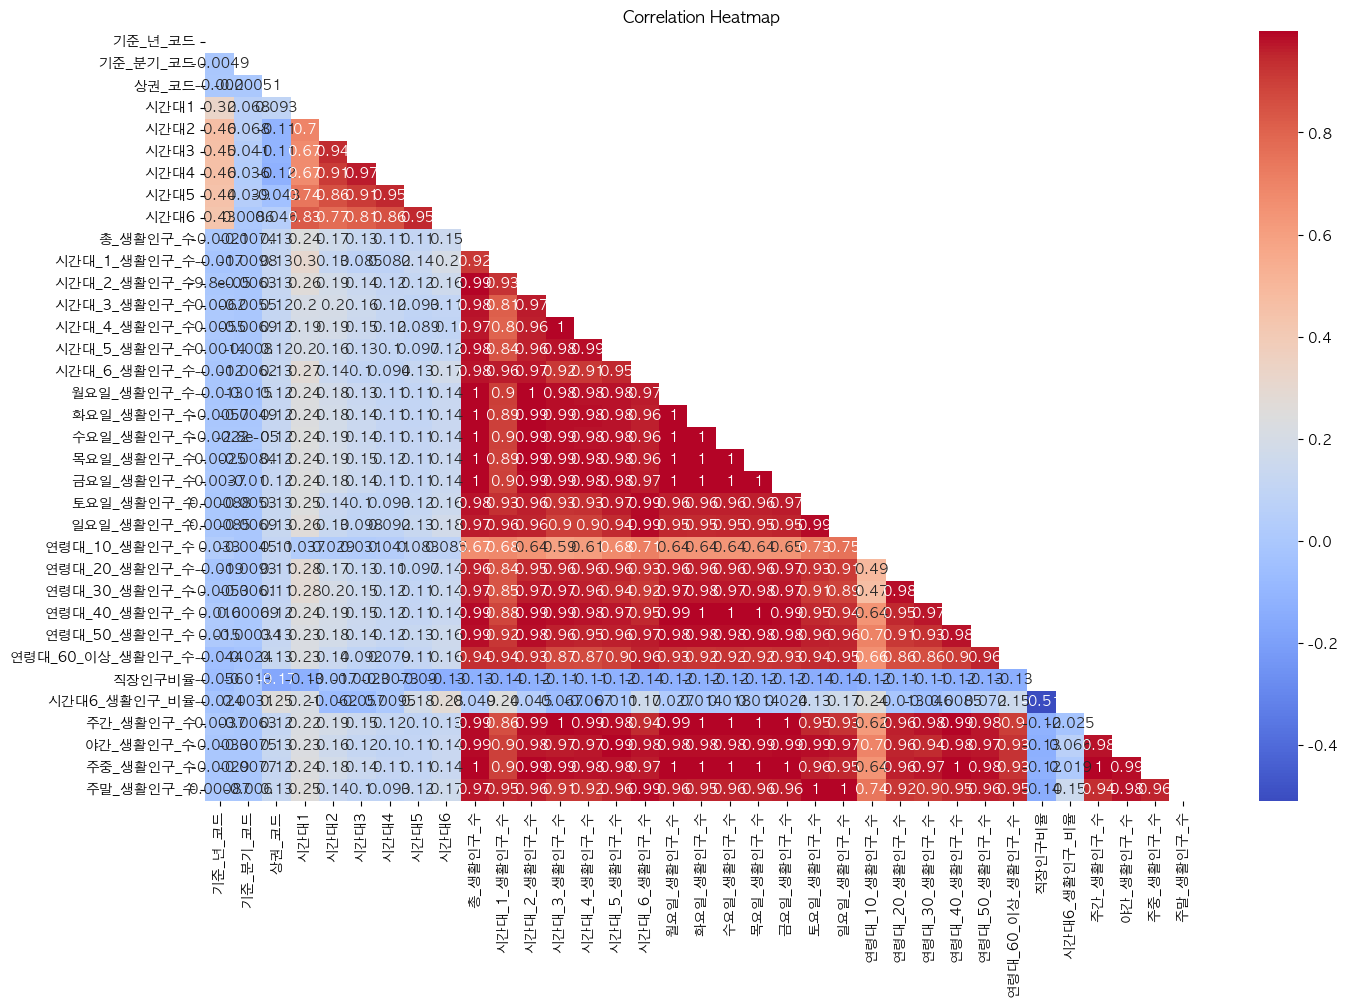

In [85]:
correlation_matrix = data_pop.corr()

# 대각선과 상관 계수가 1인 부분을 숨기는 마스크 생성
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Figure와 Axes 생성
fig, ax = plt.subplots(figsize=(16, 10))

# 상관 행렬을 히트맵으로 시각화
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, ax=ax, mask=mask)

# 히트맵 제목 설정 (선택 사항)
ax.set_title('Correlation Heatmap')

plt.show()  # 플롯 보기